<div >
    <center> <font size=7 color=red><b>image classification </b></font>
    </center>
    <br>
    
</div>


#**Linear neural network for image classification with no activation & no convolution.**


# **Step 1 : Load The CSV file, read the images, and Create a Tensorflow dataset**

In [1]:
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy','dandelion','roses','sunflowers','tulips']

In [2]:
def read_and_decode(filename, resize_dims):
  #1. Read the raw file
  img_bytes = tf.io.read_file(filename)
  #2. Decode image data
  img = tf.image.decode_jpeg(img_bytes,channels = IMG_CHANNELS)
  #3. Convert pixel values to float in  [0,1]
  img = tf.image.convert_image_dtype(img,tf.float32)
  #4. Resizen the image to match desired dimentions
  img = tf.image.resize(img,resize_dims)
  return img

In [3]:
def parse_csvline(csv_line):
  #record_defaults specify the data types for each column
  record_default = ["",""]
  filename,label_string = tf.io.decode_csv(csv_line, record_default)

  #Load the imege
  img = read_and_decode(filename,[IMG_HEIGHT,IMG_WIDTH])

  #Convert label string to integer based on the CLASS_NAMES index
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img ,label

In [4]:
# Define datasets
train_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/train_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
  )

eval_dataset = (
    tf.data.TextLineDataset("gs://cloud-ml-data/img/flower_photos/eval_set.csv")
    .map(parse_csvline, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(16)
    .prefetch(tf.data.AUTOTUNE)
)

# **Step 2 : Create a batch dataset of images**

In [5]:
for image_batch , label_batch in train_dataset.take(1):
  print("Image batch shape :", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print("Labels:" ,label_batch.numpy())

Image batch shape : (16, 224, 224, 3)
Label batch shape: (16,)
Labels: [0 1 1 1 0 2 1 0 4 3 0 3 1 4 4 1]


# **Step 3 : Visualize a single image example**

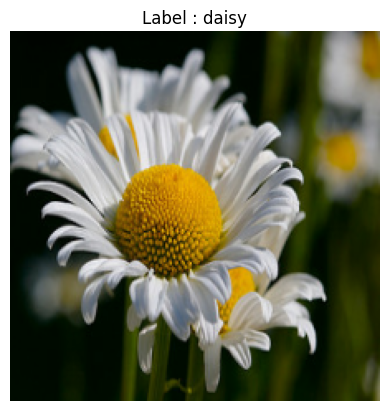

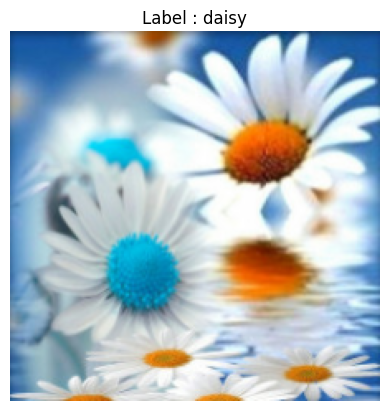

In [6]:
import matplotlib.pyplot as plt

for image_batch,label_batch in train_dataset.take(2):
  #Take the first image from the batch
  first_image = image_batch[0]
  first_label = label_batch[0]

  # Convert tensor to numpy array
  plt.imshow(first_image.numpy())
  plt.title(f"Label : {CLASS_NAMES[first_label]}")
  plt.axis('off')
  plt.show()


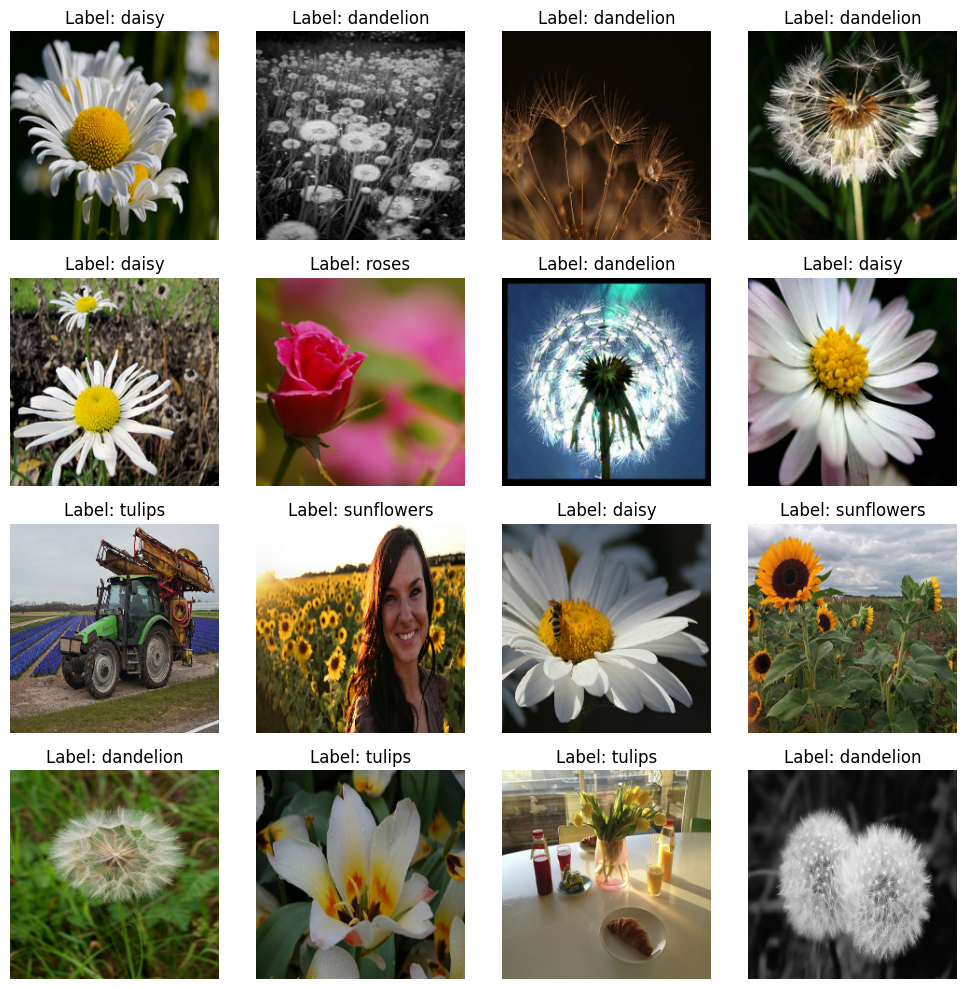

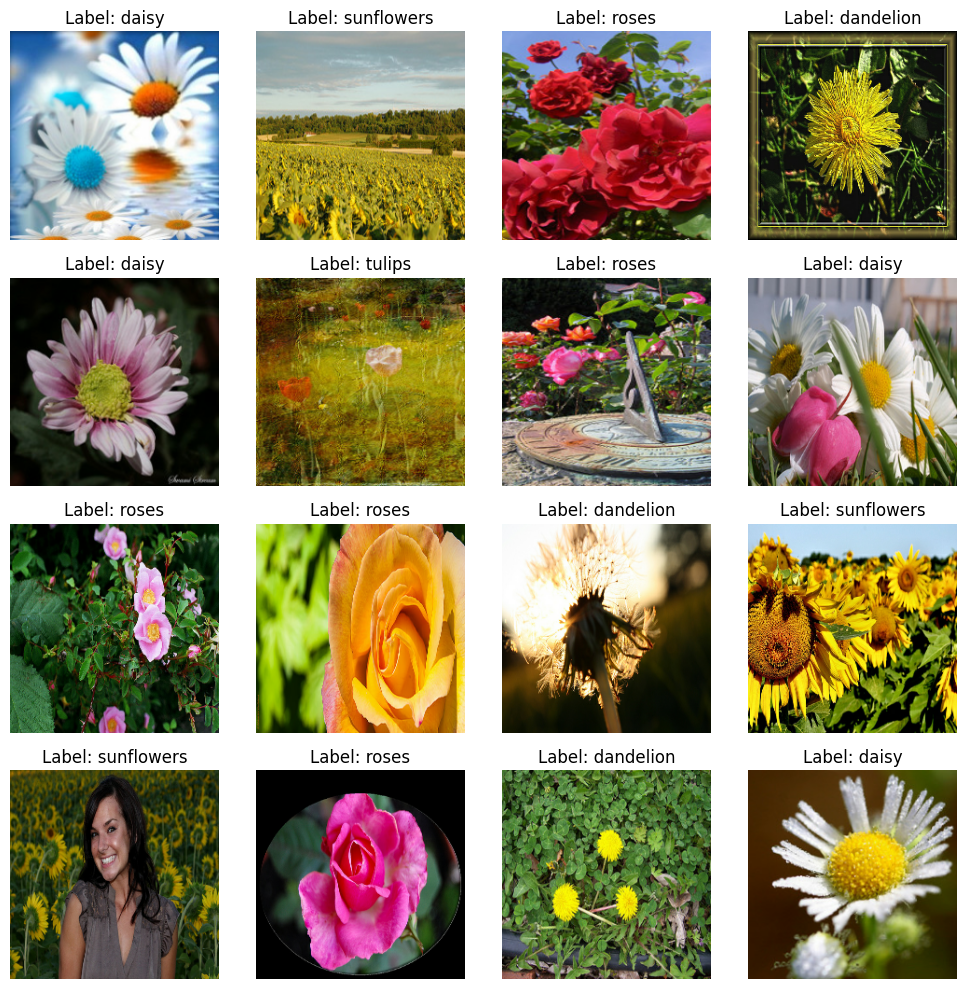

In [7]:
import matplotlib.pyplot as plt

# Take one batch from the dataset
for image_batch, label_batch in train_dataset.take(2):
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Create a 4x4 grid

    for i in range(16):  # Loop over the first 16 images
        ax = axes[i // 4, i % 4]  # Determine grid position
        ax.imshow(image_batch[i].numpy())  # Convert tensor to numpy array
        ax.set_title(f"Label: {CLASS_NAMES[label_batch[i]]}")
        ax.axis("off")  # Hide axes

    plt.tight_layout()
    plt.show()


# **Step 4 : Linear neural network for image classification**

# We will do 3 operations  in our linear neural network


#1.   Flattening
#2.   Dense fully connected
#3.   Softmax





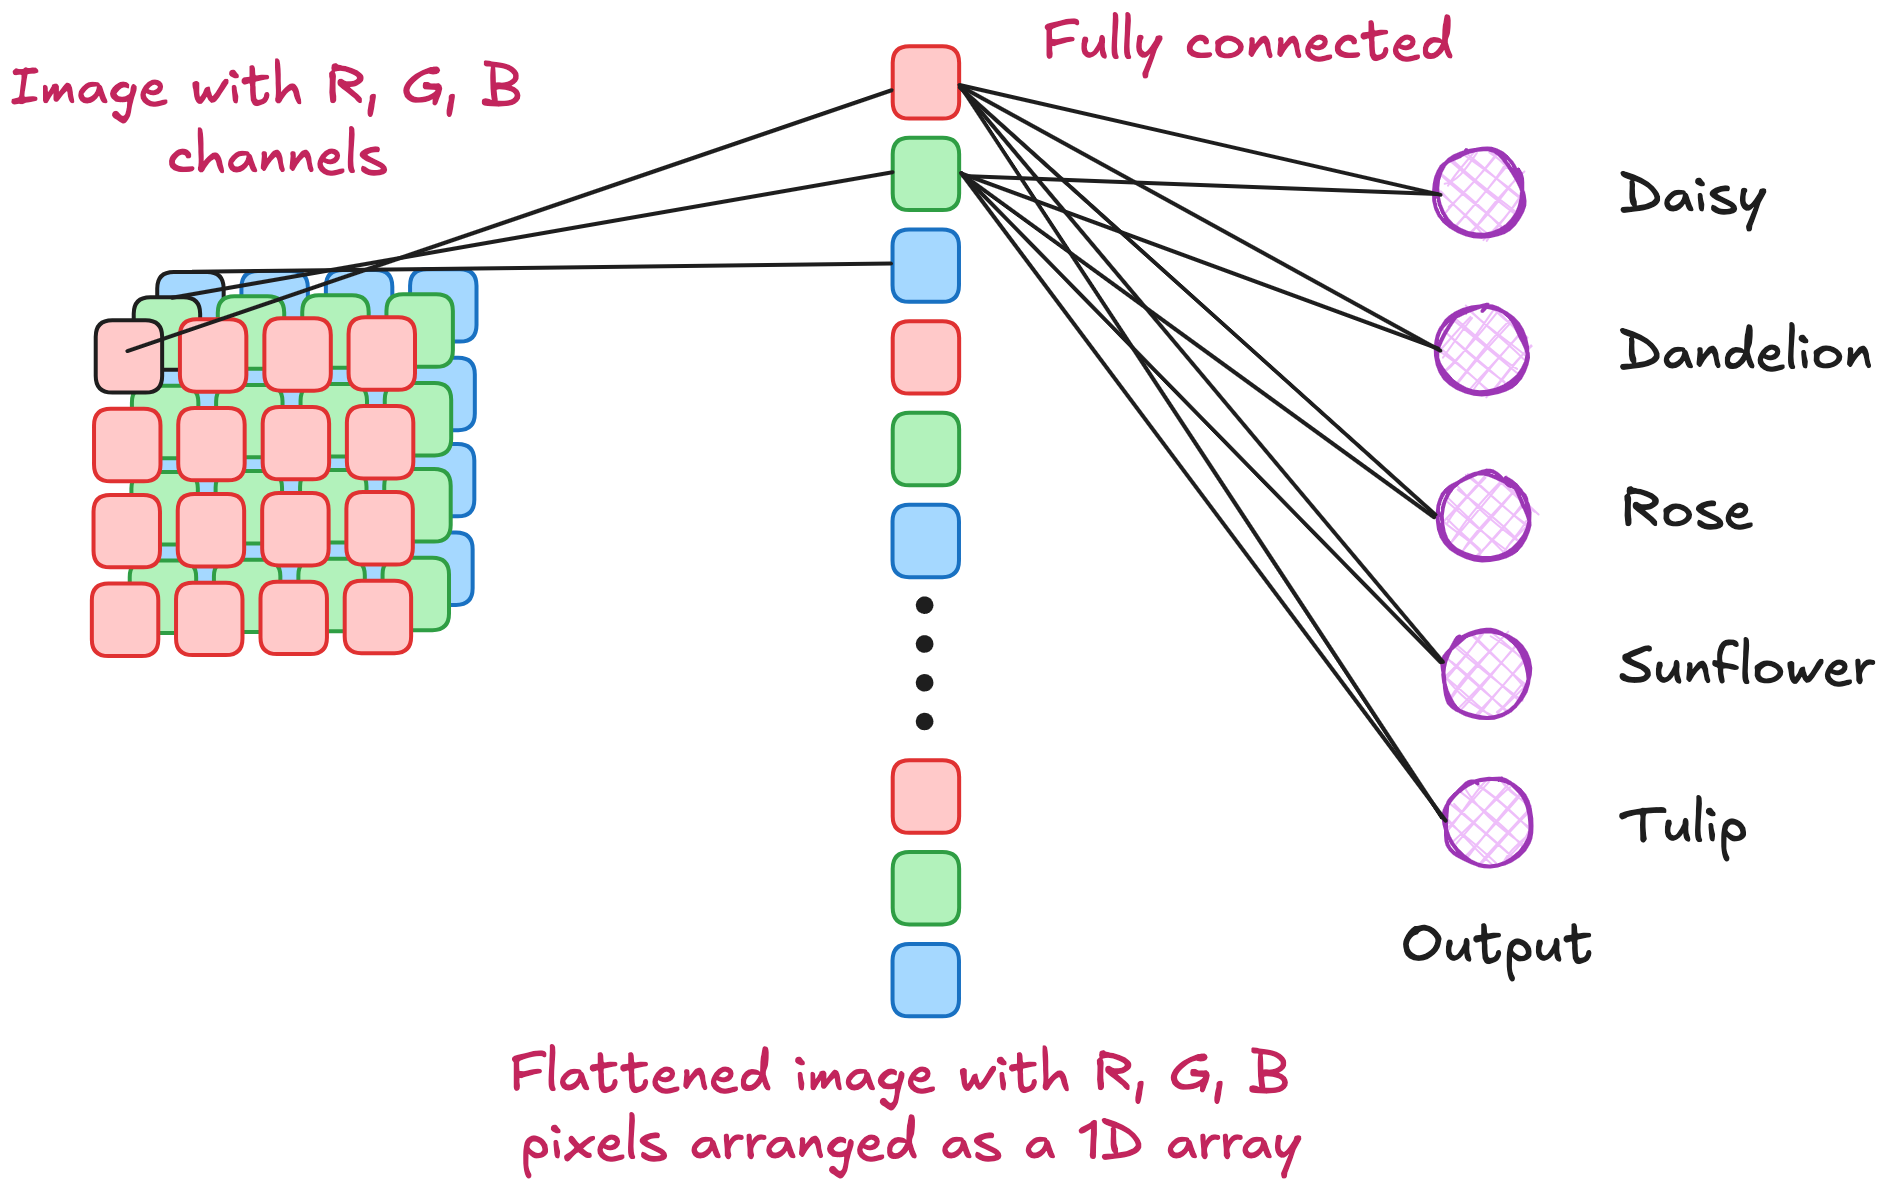

In [7]:
from IPython.display import Image, display

# Replace with your filename
display(Image("image.png" ,width=1000, height=500))


# **Defining a linear model using Keras**

In [9]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (IMG_HEIGHT,IMG_WIDTH, IMG_CHANNELS)),
    keras.layers.Dense(len(CLASS_NAMES),activation="softmax")
                          ])

model.compile(
    optimizer = "adam",
    loss= keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Training the linear model.**

In [10]:
EPOCHS = 10

history = model.fit(
    train_dataset,
    validation_data = eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
    207/Unknown 195s 933ms/step - accuracy: 0.3094 - loss: 18.1954

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


207/207 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.3096 - loss: 18.1711 - val_accuracy: 0.3919 - val_loss: 13.2964
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 191s 922ms/step - accuracy: 0.4149 - loss: 10.5326 - val_accuracy: 0.2919 - val_loss: 20.4364
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 181s 876ms/step - accuracy: 0.4425 - loss: 10.7830 - val_accuracy: 0.4351 - val_loss: 17.7978
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 180s 868ms/step - accuracy: 0.4890 - loss: 10.5777 - val_accuracy: 0.3297 - val_loss: 17.7176
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 172s 830ms/step - accuracy: 0.4810 - loss: 11.0941 - val_accuracy: 0.3730 - val_loss: 14.4138
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 165s 795ms/step - accuracy: 0.5487 - loss: 7.5460 - val_accuracy: 0.4027 - val_loss: 16.9448
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 162s 783ms/step - accuracy: 0.5579 - loss: 8.7704 - val_accuracy: 0.4189 - val_loss: 14.8494
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 150s 722ms/step - accuracy: 0.5330 - l

# **Step 5 : Visualizing the training and validation losses**

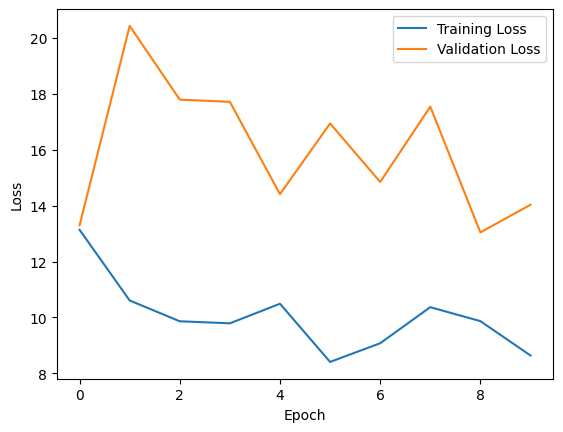

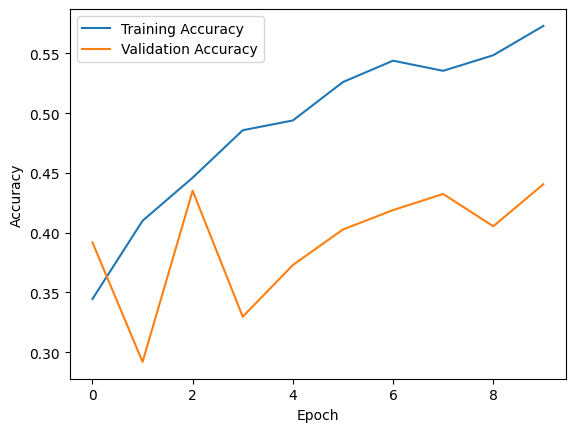

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Step 6 : Making Predictions on some sample validation data.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


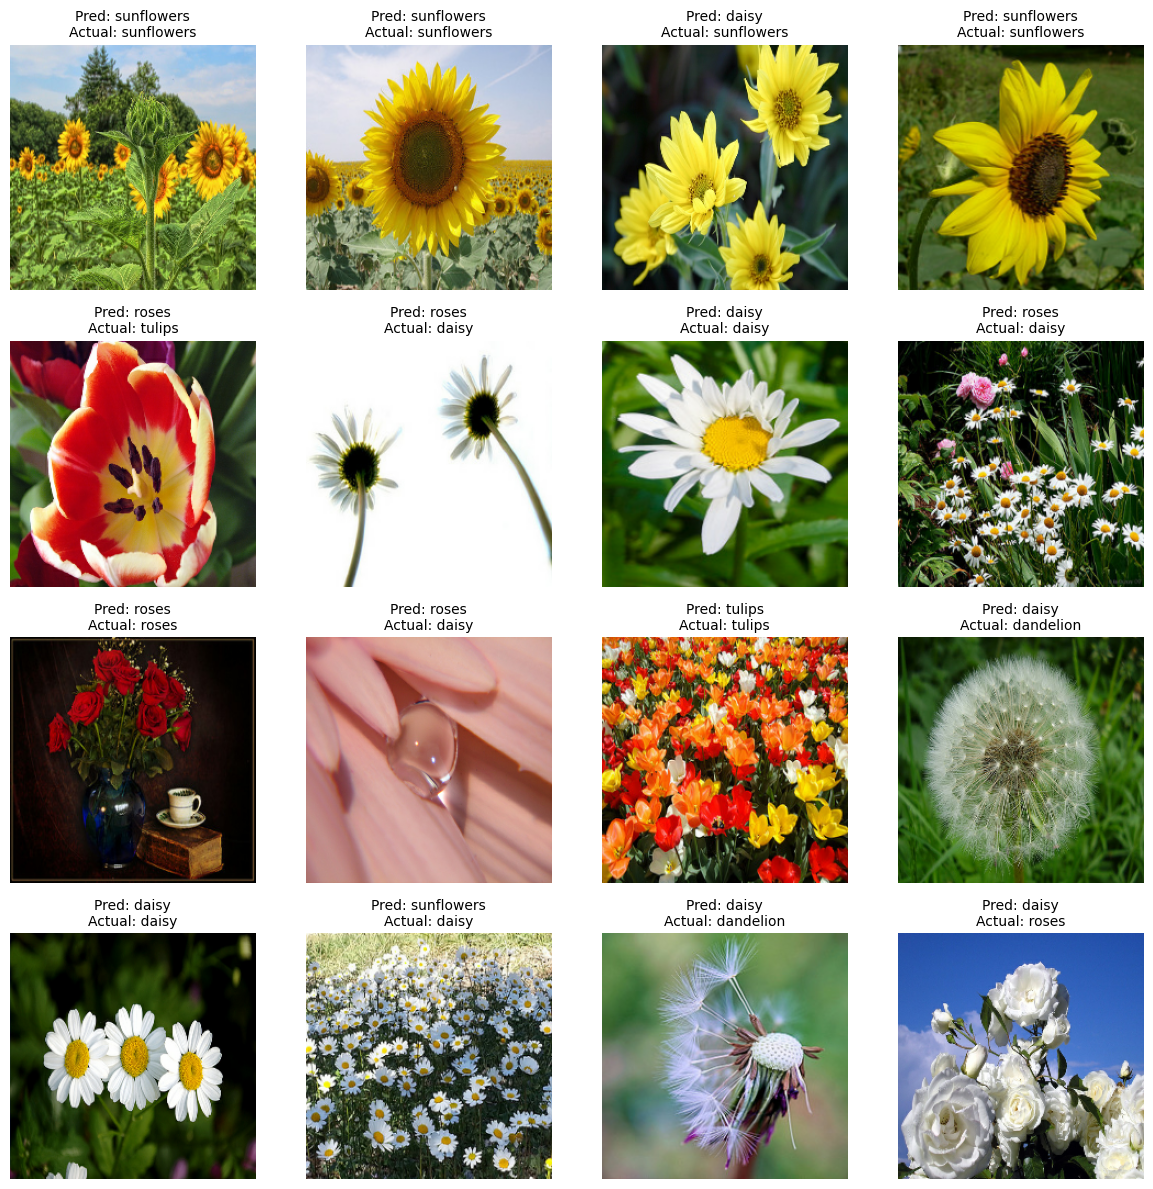

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Take exactly one batch from the evaluation dataset
for images, labels in eval_dataset.take(1):
    # Get model predictions for this batch
    batch_predictions = model.predict(images)
    predicted_indices = np.argmax(batch_predictions, axis=1)

    # Number of images in this batch
    num_images = images.shape[0]

    # Configure how many images to display per row
    num_cols = 4
    num_rows = math.ceil(num_images / num_cols)

    # Create a figure with a suitable size
    plt.figure(figsize=(12, 3 * num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)

        # Display the image
        plt.imshow(images[i].numpy())
        plt.axis('off')

        # Get predicted and actual class names
        pred_class = CLASS_NAMES[predicted_indices[i]]
        actual_class = CLASS_NAMES[labels[i].numpy()]

        # Show both predicted and actual labels as title
        plt.title(f"Pred: {pred_class}\nActual: {actual_class}", fontsize=10)

    # Adjust spacing to avoid overlapping titles, etc.
    plt.tight_layout()
    plt.show()

***Our validation acuracy is 40-50%*, this is bad because the model we used is purely linear model,will not capture intricate patterns. So what we can do to improve our model  accuracy ?**

# **Non Linear neural network for image classification with activation & convolution.**


#**Defining a new model with 2 hidden layers  using Keras**

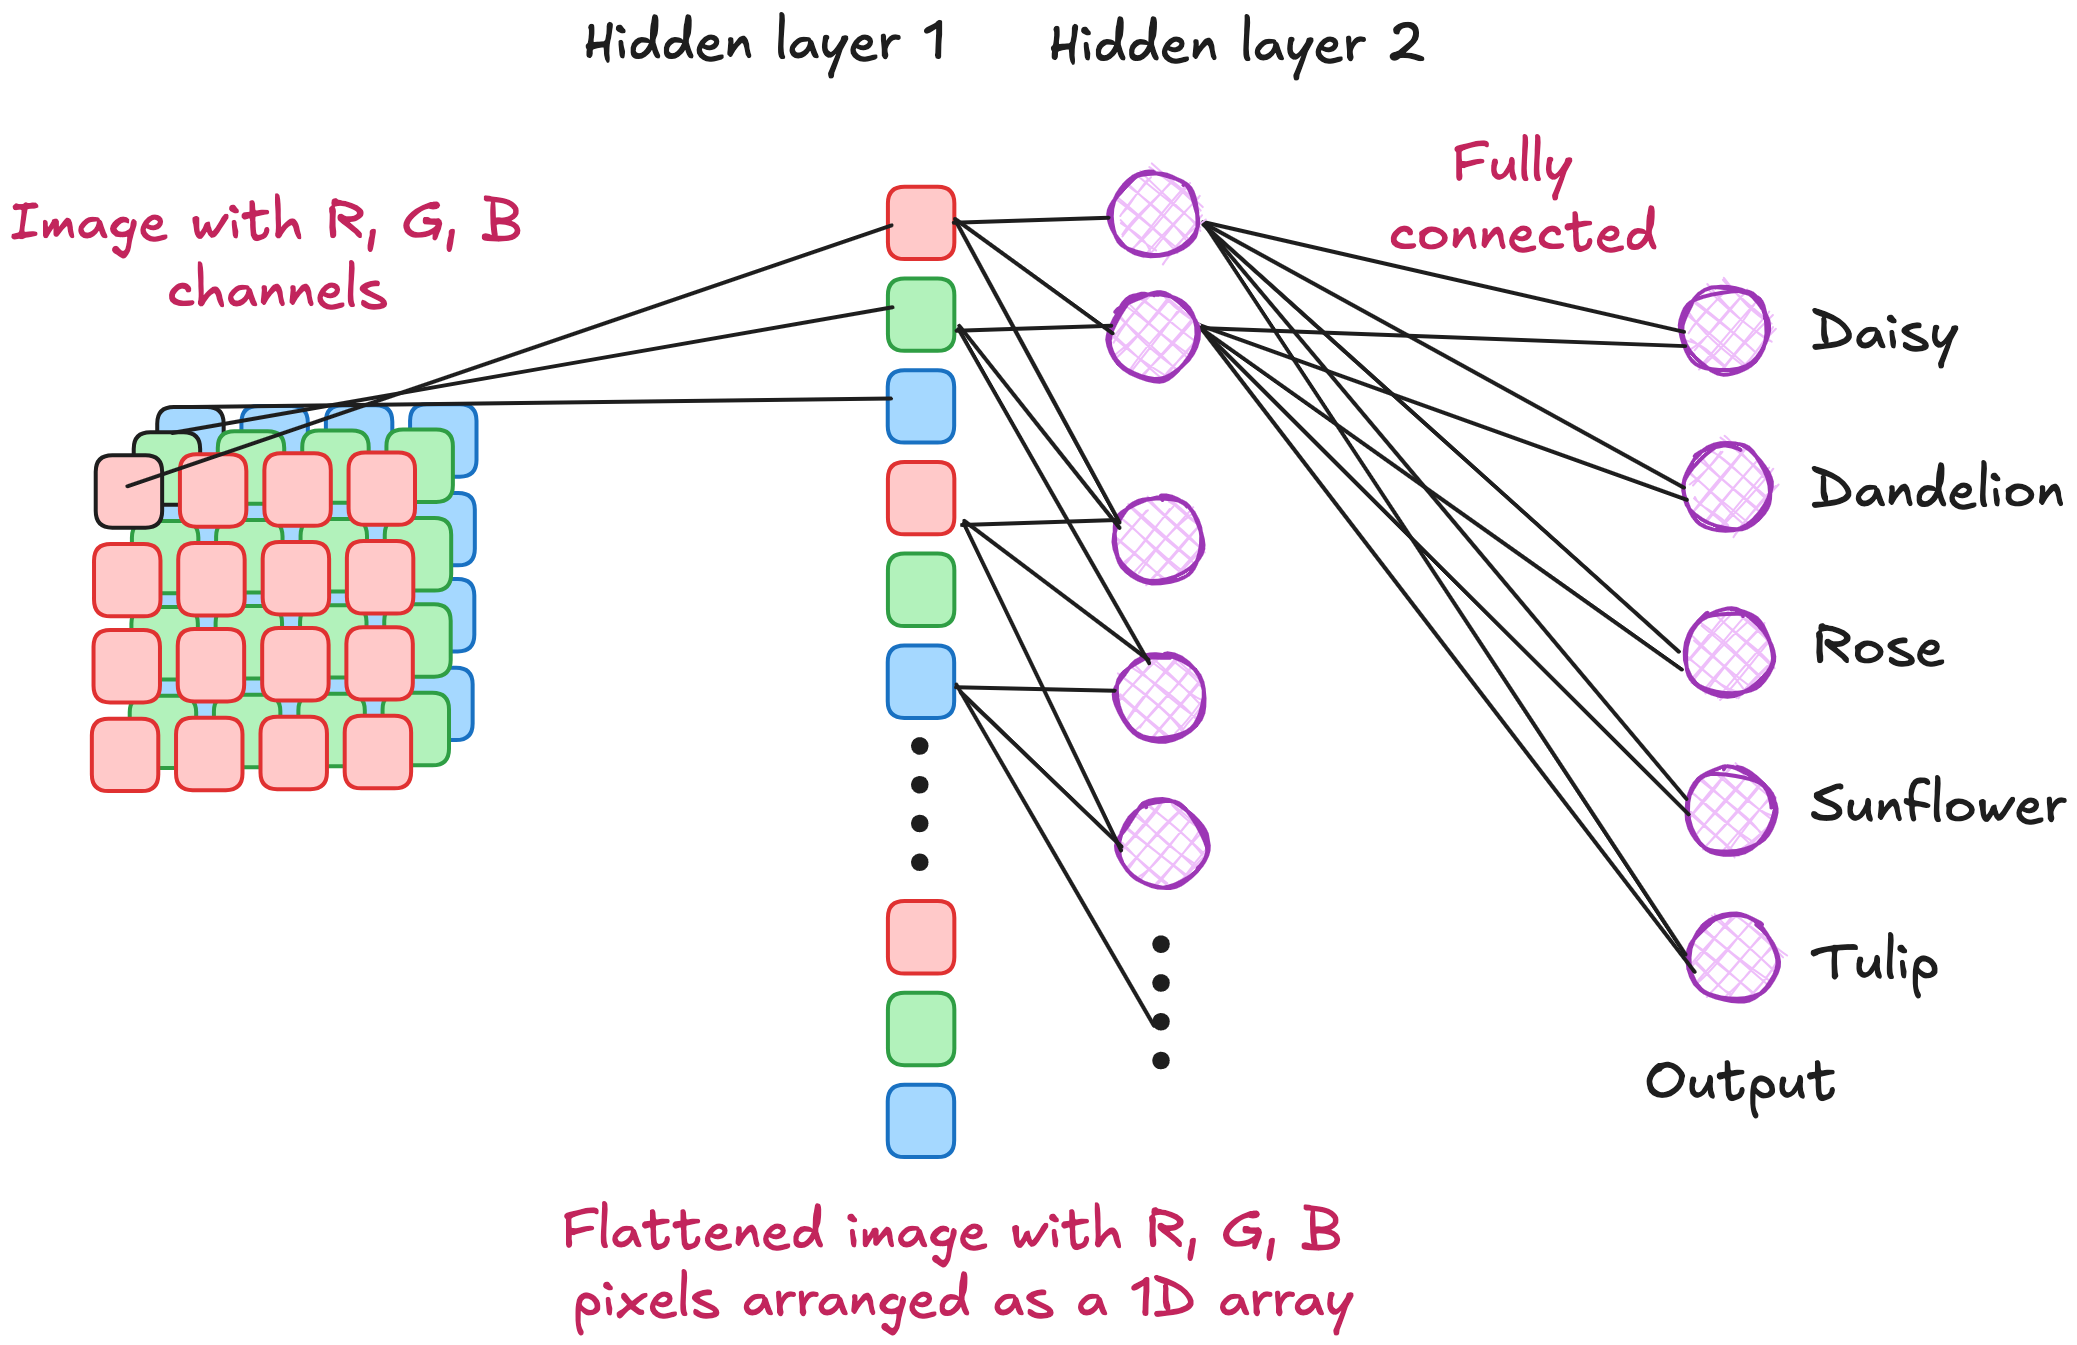

In [13]:
from IPython.display import Image, display

# Replace with your filename
display(Image("Deep.png" ,width=1000, height=500))


In [14]:
model2 = keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (IMG_HEIGHT,IMG_WIDTH, IMG_CHANNELS)),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(len(CLASS_NAMES),activation="softmax")
                          ])

In [15]:
model2.compile(
    optimizer = "adam",
    loss= keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

# **Training and validation.**

In [16]:
EPOCHS = 10

history2 = model2.fit(
    train_dataset,
    validation_data = eval_dataset,
    epochs=EPOCHS
)

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 146s 692ms/step - accuracy: 0.3166 - loss: 22.0988 - val_accuracy: 0.3595 - val_loss: 7.9904
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 138s 669ms/step - accuracy: 0.4135 - loss: 7.1980 - val_accuracy: 0.3270 - val_loss: 7.0759
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 135s 651ms/step - accuracy: 0.4085 - loss: 3.6074 - val_accuracy: 0.1865 - val_loss: 1.5850
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 130s 629ms/step - accuracy: 0.3122 - loss: 1.4653 - val_accuracy: 0.2486 - val_loss: 1.5753
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 132s 637ms/step - accuracy: 0.3115 - loss: 1.5082 - val_accuracy: 0.3351 - val_loss: 1.5182
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 129s 623ms/step - accuracy: 0.2894 - loss: 1.5153 - val_accuracy: 0.3000 - val_loss: 1.7148
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 126s 607ms/step - accuracy: 0.3219 - loss: 1.4625 - val_accuracy: 0.3054 - val_loss: 1.5116
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 127s 614ms/step - accuracy: 0.3548 

# **Plotting accuracy and loss**

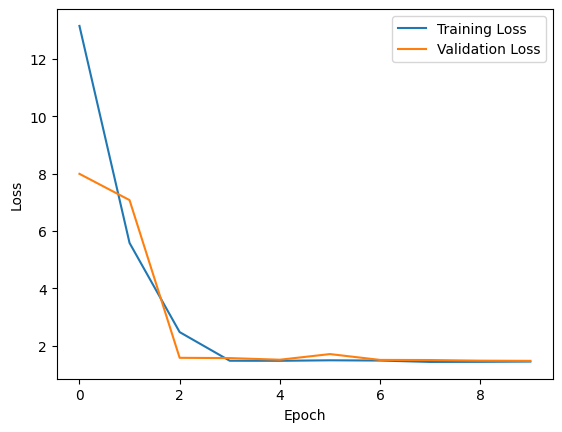

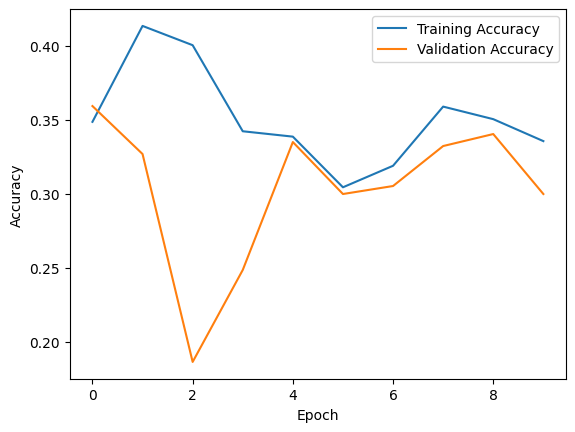

In [17]:
import matplotlib.pyplot as plt

plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history2.history["accuracy"], label="Training Accuracy")
plt.plot(history2.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Neural Network Training**


*   We might expect that adding  layers will improve the model and thus lower the loss. That is, the case. The crooss-entropy loss for the linear model is on the order of 10, it is on the order of 2 for the neural network.  
*   The accuracies are pretty similar, indicating that much of thee improvement is obtained by the model driving probabilities like 0.7 to be closer to 1.0 than by getting
items misclassified by the linear model correct


# **So adding an extra layer did not work. What else can we do?**

# **Hyperparameter tuning**

# ***See The 5_flower_dataset_Neural_Network_Hyperparameter_tuning.ipynb***